# Author: Kumar R.

**Problem Statement: Classification of Horse or Humans using CNN Algoarithm.**

Train the model using training imgaes and test the performance of the model using validation images. Check whether the model is working properly by prediction. 

In [1]:
#Import the required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#Importing the optimizer 
from tensorflow.keras.optimizers import RMSprop

In [3]:
#creating a drive path to load the dataset from the drive account. This is used only if we are training the model using google colab.
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
#Installing keras on server
!pip install -q keras

In [5]:
import keras

In [6]:
#Load the traning and testing images from the drive
train = '/content/drive/MyDrive/Colab Notebooks/Assignment1`/Train' 
test = '/content/drive/MyDrive/Colab Notebooks/Assignment1`/Validation'

In [7]:
#Rescale all the images to 1.0/255. The intensity of all the images will be 0-255.

train_data = ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')
test_data = ImageDataGenerator(rescale=1./255) 
#ImageDataGenerator is used to expand the training dataset in order to improve the performance 
#and ability of the model to generalize.

#Flow training images in a batch of 20 using train_data

train_generator = train_data.flow_from_directory(train,
                                                 batch_size=20, 
                                                 class_mode = 'binary', #Binary type classification problem(Horse and Human)
                                                 target_size=(150,150)) #target_size is the size of the image that the CNN should expect
#Flow testing images in a batch of 20 using test_data
test_generator = test_data.flow_from_directory(test,
                                               batch_size=20,
                                               class_mode='binary',#Binary type classification problem(Horse and Human)
                                               target_size=(150,150))

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


There are 1027 images of 2 classes belongs to training set and 256 images of 2 classes belongs to validation set.

In [8]:
#Initialize the CNN_model

model = tf.keras.models.Sequential()

#Add convolution layers
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) 
model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(128,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
#model.add(tf.keras.layers.Conv2D(128,(3,3), activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#Flattening : Flatten is the function that converts the pooled feature map to a single column.
model.add(tf.keras.layers.Flatten()) 

In [9]:
#Fully connected ANN 
#model.add(tf.keras.layers.Dense(units=300, activation='relu'))
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
#model.add(tf.keras.layers.Dense(units=256, activation='relu'))
#model.add(tf.keras.layers.Dense(units=128, activation='relu'))
#Output layers
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #Sigmoid as this is a binary classiification problem.

In [10]:
#Model compilation
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
#Using Earlystopping method to stop the model if the validation score is not improving after certain epochs. 
from keras.callbacks import EarlyStopping

In [12]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=10,verbose=1)

In [13]:
#Training the model
result =  model.fit_generator(train_generator,
                              steps_per_epoch =51, #Number_of_images = Bath_size*Steps_per_epoch
                              epochs=30,
                              validation_data= test_generator,
                              validation_steps = 13,#Number_of_images = Bath_size*Steps_per_epoch
                              callbacks = [early_stop],
                              verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
51/51 - 334s - loss: 2.6913 - accuracy: 0.5829 - val_loss: 3.6422 - val_accuracy: 0.5000
Epoch 2/30
51/51 - 12s - loss: 0.6748 - accuracy: 0.6395 - val_loss: 1.1104 - val_accuracy: 0.6562
Epoch 3/30
51/51 - 12s - loss: 0.6477 - accuracy: 0.6912 - val_loss: 2.8907 - val_accuracy: 0.5508
Epoch 4/30
51/51 - 12s - loss: 0.4921 - accuracy: 0.7716 - val_loss: 2.6126 - val_accuracy: 0.5820
Epoch 5/30
51/51 - 12s - loss: 0.4203 - accuracy: 0.8292 - val_loss: 3.0299 - val_accuracy: 0.6602
Epoch 6/30
51/51 - 12s - loss: 0.3133 - accuracy: 0.8689 - val_loss: 3.1590 - val_accuracy: 0.6758
Epoch 7/30
51/51 - 12s - loss: 0.2941 - accuracy: 0.8848 - val_loss: 1.1162 - val_accuracy: 0.7852
Epoch 8/30
51/51 - 12s - loss: 0.2477 - accuracy: 0.9167 - val_loss: 10.8407 - val_accuracy: 0.5898
Epoch 9/30
51/51 - 12s - loss: 0.3155 - accuracy: 0.9027 - val_loss: 3.7223 - val_accuracy: 0.5938
Epoch 10/30
51/51 - 12s - loss: 0.2286 - accuracy: 0.9325 - val_loss: 3.6646 - val_accuracy: 0.7109
Epoch 1

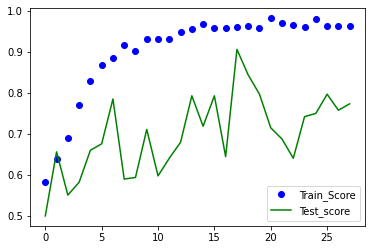

In [14]:
#Visualization of the model's performance
import matplotlib.pyplot as plt
%matplotlib inline
train_score = result.history['accuracy']
test_score = result.history['val_accuracy']

plt.plot(train_score, 'bo', label='Train_Score')
plt.plot(test_score, 'g', label='Test_score')
plt.legend()

In [16]:
#prediction - 1
image_loc = '/content/drive/MyDrive/Colab Notebooks/Assignment1`/Validation/horses/horse1-122.png'

#Image Loading
load_image = tf.keras.preprocessing.image.load_img(image_loc, target_size=(150,150))
#Converting image to array
image_array = tf.keras.preprocessing.image.img_to_array(load_image)
#Model expects image input in the form of batch
batch_image = np.array([image_array])

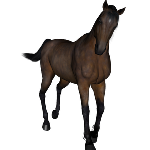

In [17]:
#the image I'm supplying as an input
load_image

In [24]:
#predict the classification of the image
pred = model.predict(batch_image)
predict = (model.predict(batch_image)>0.5).astype('int32')
print('predicted values: ',pred)
print('Predicted class: ',predict)
print("")
if predict ==0:
  print("Its a horse")
else:
  print("Its a human")

predicted values:  [[0.]]
Predicted class:  [[0]]

Its a horse


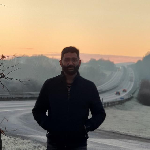

In [19]:
#prediction - 2
image_loc = '/content/drive/MyDrive/Colab Notebooks/Assignment1`/Anil.jpg'
#load the image
image_load = tf.keras.preprocessing.image.load_img(image_loc, target_size=(150,150))
#Convert image to array
image_aray = tf.keras.preprocessing.image.img_to_array(image_load)
#Batch array
image_batch = np.array([image_aray])
image_load

In [25]:
#Predicting the classification of image.
predi = model.predict(image_batch)
prediction = (model.predict(image_batch)>0.5).astype('int32')
print('predicted value: ',predi)
print('predicted class: ',prediction)
print("")
if prediction==0:
  print("It's a Horse")
else:
  print('Its a Human')

predicted value:  [[1.]]
predicted class:  [[1]]

Its a Human


In [ ]:
#The model classified the images correctly.